In [1]:
#Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip

In [14]:
#Cargamos los datasets
df_df_items = pd.read_parquet('dataset/df_user_df_items_final.parquet')
df_games = pd.read_parquet('dataset/df_steam_df_games.parquet')
df_reviews = pd.read_parquet('dataset/df_user_df_df_reviews_final.parquet')


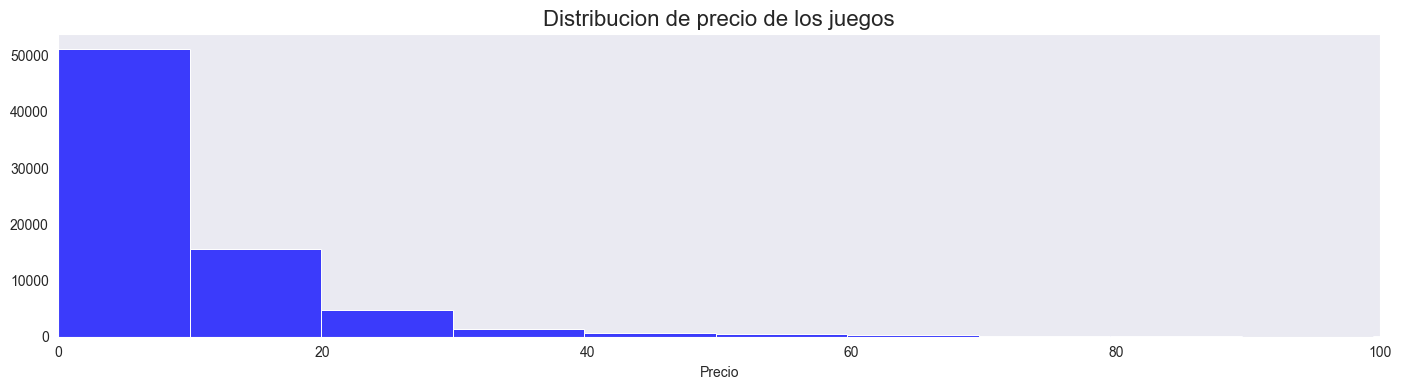

In [6]:
#obtengo los precios para cada juego
sns.set_style('dark')

fig = plt.figure(figsize=(14, 4))

#Creo el histograma
sns.histplot(data=df_games, x='price', bins = 100, color='blue')
#Agrego las etiquetas al histograma
plt.xlabel('Precio')
plt.ylabel('')
plt.title('Distribucion de precio de los juegos', fontsize=16)

#Ajusto margenes y muestro el grafico
plt.tight_layout()
plt.xlim(0, 100)
plt.show()

C:\Users\juank\AppData\Local\Temp\ipykernel_12020\410925040.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_counts, y='genres', palette='viridis', order=order)


Text(0.5, 1.0, 'Top 10 de genero de juegos')

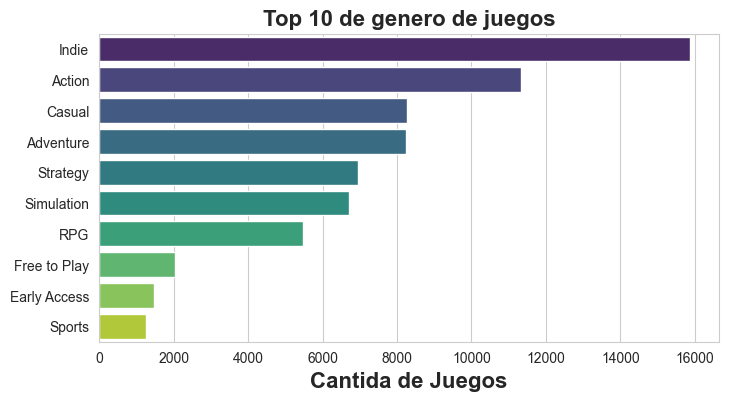

In [7]:
#Cuento la cantidad de juegos por genero y creo la lista de los top 10
genre_counts = df_games['genres'].value_counts().nlargest(10).index
genre_counts = df_games[df_games['genres'].isin(genre_counts)]
order = genre_counts['genres'].value_counts().index

#Configuro el estilo del grafico
sns.set_style('whitegrid')

#Creo el grafico
plt.figure(figsize=(8,4))

sns.countplot(data=genre_counts, y='genres', palette='viridis', order=order)

#Añado etiquetas y titulo
plt.xlabel('Cantida de Juegos', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.title('Top 10 de genero de juegos', fontsize=16, fontweight='bold')

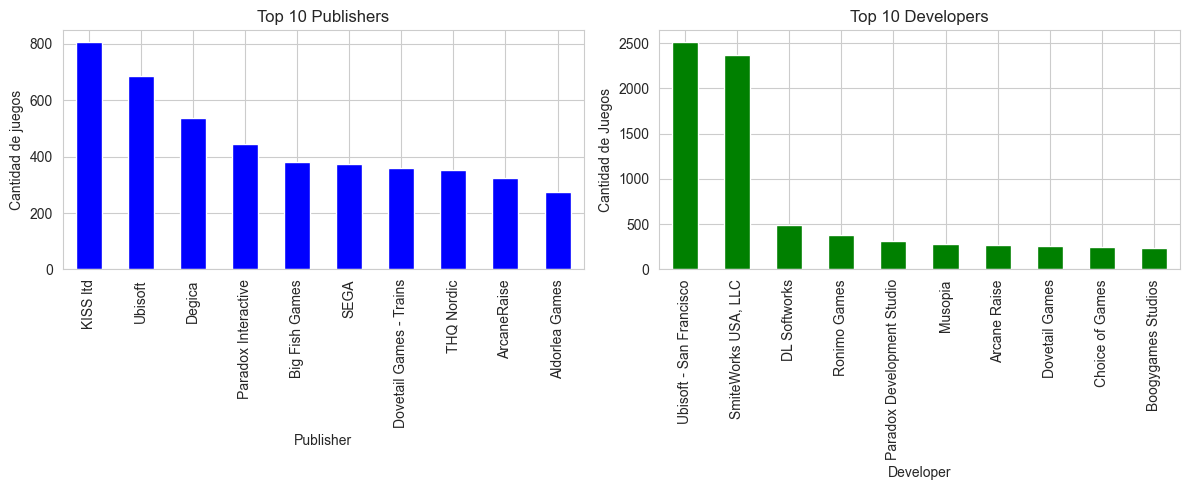

In [8]:
# Cantidad de juegos por publisher
conteo_publisher = df_games['publisher'].value_counts()

#Cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

#Creo una figura con dos subplots
plt.figure(figsize=(12,5))

#Subplot para publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='blue')
plt.xlabel('Publisher') 
plt.ylabel('Cantidad de juegos')
plt.title('Top 10 Publishers')

#Segundo subplot para developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='green')
plt.xlabel('Developer')
plt.ylabel('Cantidad de Juegos')
plt.title('Top 10 Developers')

#Muestro los graficos y ajusto el espacio entre los subplots
plt.tight_layout()
plt.show()

In [18]:
df_df_reviews.columns

Index(['user_id', 'user_url', 'reviews_item_id', 'reviews_helpful',
       'reviews_recommend', 'reviews', 'reviews_date', 'sentiment_analysis'],
      dtype='object')

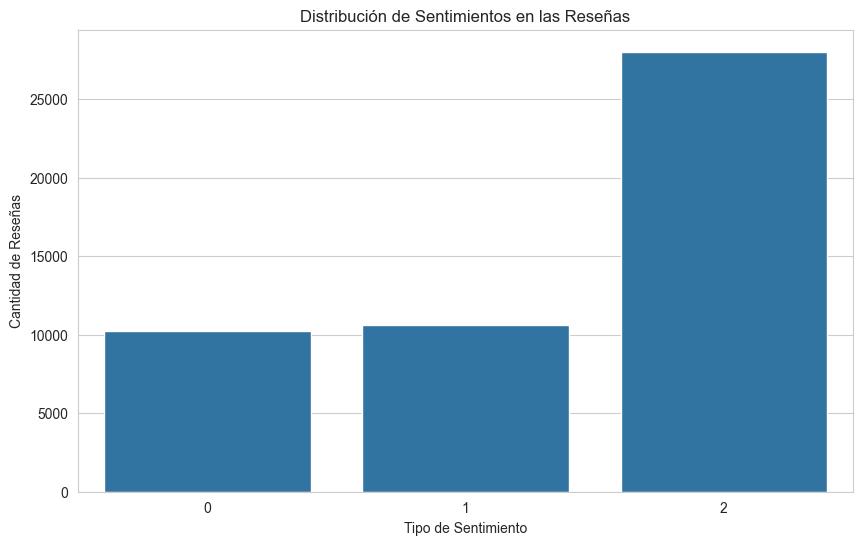

In [20]:
# Contamos la cantidad de reseñas por cada tipo de sentimiento
sentiment_count = df_df_reviews['sentiment_analysis'].value_counts().reset_index()
sentiment_count.columns = ['sentiment', 'count']

# Configuramos el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras con seaborn
sns.barplot(x='sentiment', y='count', data=sentiment_count)

# Añadimos títulos y etiquetas
plt.title('Distribución de Sentimientos en las Reseñas')
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Cantidad de Reseñas')

# Mostramos el gráfico
plt.show()